## PEPTIDE EDA

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Read the data into a DataFrame
peptide_data = pd.read_csv("peptide_sequences.txt")

In [3]:
peptide_data

,>A1L0T0227|1|training
0,VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE
1,>A1L0T0230|1|training
2,PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL
3,>A1L0T0284|1|training
4,SPQQVQRCVEILSRAKRPLMVLGSQALLTPT
...,...
594,SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD
595,>E9PGC8275|0|testing
596,DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL
597,>E9PGC8307|0|testing


In [4]:
# Display the head of the DataFrame
print("Head of the DataFrame:")
print(peptide_data.head())
print()

Head of the DataFrame:
             >A1L0T0227|1|training
0  VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE
1            >A1L0T0230|1|training
2  PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL
3            >A1L0T0284|1|training
4  SPQQVQRCVEILSRAKRPLMVLGSQALLTPT



In [5]:
# Display the tail of the DataFrame
print("Tail of the DataFrame:")
print(peptide_data.tail())
print()


Tail of the DataFrame:
               >A1L0T0227|1|training
594  SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD
595             >E9PGC8275|0|testing
596  DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL
597             >E9PGC8307|0|testing
598  AVNGFNILVDGGSDRKSCFWKLVRHLDRIDS



In [6]:
# Display basic statistics of the DataFrame
print("Description of the DataFrame:")
print(peptide_data.describe())
print()



Description of the DataFrame:
                  >A1L0T0227|1|training
count                               599
unique                              599
top     VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE
freq                                  1



In [7]:
# Display data types of each column
print("Data types of each column:")
print(peptide_data.dtypes)
print()


Data types of each column:
>A1L0T0227|1|training    object
dtype: object



In [8]:
peptide_data.shape

(599, 1)

In [9]:
peptide_data.columns.tolist()

['>A1L0T0227|1|training']

In [10]:
peptide_data.nunique()

>A1L0T0227|1|training    599
dtype: int64

In [11]:
# Display unique values in each column
print("Unique values in each column:")
for column in peptide_data.columns:
    unique_values = peptide_data[column].unique()
    print(f"{column}: {unique_values}")
print()

Unique values in each column:
>A1L0T0227|1|training: ['VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE' '>A1L0T0230|1|training'
 'PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL' '>A1L0T0284|1|training'
 'SPQQVQRCVEILSRAKRPLMVLGSQALLTPT' '>A1L0T0599|1|training'
 'ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV' '>A1X283805|1|training'
 'AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG' '>A2A274545|1|training'
 'LKFNPETDYLTGTDGKKFRLEAPDADELPKG' '>A2A274559|1|training'
 'GKKFRLEAPDADELPKGEFDPGQDTYQHPPK' '>A2A274574|1|training'
 'KGEFDPGQDTYQHPPKDSSGQHVDVSPTSQR' '>A2A274616|1|training'
 'GKDLEDLQILIKVKGKCTTDHISAAGPWLKF' '>A2A274630|1|training'
 'GKCTTDHISAAGPWLKFRGHLDNISNNLLIG' '>A2A274755|1|training'
 'YNKIHPVDKLTIQGLKDFTPGKPLKCIIKHP' '>A2A274761|1|training'
 'VDKLTIQGLKDFTPGKPLKCIIKHPNGTQET' '>A2A274764|1|training'
 'LTIQGLKDFTPGKPLKCIIKHPNGTQETILL' '>A2RRP1679|1|training'
 'ELLKLVNFSKLTLEQKELCRCRRKLLTYLDR' '>A2RRP11057|1|training'
 'QILSVSELLEKHGLEKPISFVKNTQSSSEEA' '>A2RUC4194|1|training'
 'LFSPRDAQYLYLKGTKSEVLNIDNPDLAKYP' '>A3KMH1989|1|training'
 '

In [12]:
# Check for null values
print("Null values in the DataFrame:")
print(peptide_data.isnull().sum())
print()


Null values in the DataFrame:
>A1L0T0227|1|training    0
dtype: int64



#  Data Cleaning

In [13]:
import pandas as pd
import re

# Read the data from the file
with open("peptide_sequences.txt", "r") as file:
    data = file.readlines()
    print(data)

# Combine the lines into a single string
combined_data = "".join(data)
print(combined_data)

['>A1L0T0227|1|training\n', 'VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE\n', '>A1L0T0230|1|training\n', 'PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL\n', '>A1L0T0284|1|training\n', 'SPQQVQRCVEILSRAKRPLMVLGSQALLTPT\n', '>A1L0T0599|1|training\n', 'ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV\n', '>A1X283805|1|training\n', 'AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG\n', '>A2A274545|1|training\n', 'LKFNPETDYLTGTDGKKFRLEAPDADELPKG\n', '>A2A274559|1|training\n', 'GKKFRLEAPDADELPKGEFDPGQDTYQHPPK\n', '>A2A274574|1|training\n', 'KGEFDPGQDTYQHPPKDSSGQHVDVSPTSQR\n', '>A2A274616|1|training\n', 'GKDLEDLQILIKVKGKCTTDHISAAGPWLKF\n', '>A2A274630|1|training\n', 'GKCTTDHISAAGPWLKFRGHLDNISNNLLIG\n', '>A2A274755|1|training\n', 'YNKIHPVDKLTIQGLKDFTPGKPLKCIIKHP\n', '>A2A274761|1|training\n', 'VDKLTIQGLKDFTPGKPLKCIIKHPNGTQET\n', '>A2A274764|1|training\n', 'LTIQGLKDFTPGKPLKCIIKHPNGTQETILL\n', '>A2RRP1679|1|training\n', 'ELLKLVNFSKLTLEQKELCRCRRKLLTYLDR\n', '>A2RRP11057|1|training\n', 'QILSVSELLEKHGLEKPISFVKNTQSSSEEA\n', '>A2RUC4194|1|training\n', 'LFSPRDAQYL

In [14]:
new_data = combined_data.split(">")

geneID = []
label = []
train_test = []
sequence = []

for i in range(len(new_data)):
    data_temp = new_data[i]
    if(data_temp)!="":
        geneID.append(data_temp.split("|")[0])
        label.append(int(data_temp.split("|")[1]))
        train_test.append(data_temp.split("|")[2].split("\n")[0])
        sequence.append(data_temp.split("|")[2].split("\n")[1])

In [15]:
import pandas as pd

# Assuming your data is stored in lists geneID, label, train_test, and sequence

# Combine the lists into a dictionary
data_dict = {
    "GeneID": geneID,
    "Label": label,
    "Train_Test": train_test,
    "Sequence": sequence
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Display the DataFrame
print(df)


        GeneID  Label Train_Test                         Sequence
0    A1L0T0227      1   training  VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE
1    A1L0T0230      1   training  PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL
2    A1L0T0284      1   training  SPQQVQRCVEILSRAKRPLMVLGSQALLTPT
3    A1L0T0599      1   training  ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV
4    A1X283805      1   training  AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG
..         ...    ...        ...                              ...
295  E9PGC8113      0    testing  RLFITRHLAHFSSEVKGQRTLCHQSEILETI
296  E9PGC8153      0    testing  ISSEVHHLLSSSSAYKLLILSGQSLEPGGDL
297  E9PGC8272      0    testing  SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD
298  E9PGC8275      0    testing  DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL
299  E9PGC8307      0    testing  AVNGFNILVDGGSDRKSCFWKLVRHLDRIDS

[300 rows x 4 columns]


In [16]:
df.drop(columns=["GeneID"], inplace=True)

In [17]:
df

,Label,Train_Test,Sequence
0,1,training,VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE
1,1,training,PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL
2,1,training,SPQQVQRCVEILSRAKRPLMVLGSQALLTPT
3,1,training,ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV
4,1,training,AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG
...,...,...,...
295,0,testing,RLFITRHLAHFSSEVKGQRTLCHQSEILETI
296,0,testing,ISSEVHHLLSSSSAYKLLILSGQSLEPGGDL
297,0,testing,SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD
298,0,testing,DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL


# BAR PLOT

In [18]:
# Function for creating Data Quality Report for Continuous Variables
def dq_report_continuous(df, feature, description):
    data = df[feature]
    report = {
        "Feature": feature,
        "Desc.": description,
        "Count": len(data),
        "% of Missing": (data.isna().sum() / len(data)) * 100,
        "Card.": len(data.unique()),
        "Min.": data.min(),
        "Q1": data.quantile(0.25),
        "Median": data.median(),
        "Q3": data.quantile(0.75),
        "Max.": data.max(),
        "Mean": data.mean(),
        "Std. Dev.": data.std()
    }
    return report


# Function for creating Data Quality Report for Categorical Variables
def dq_report_categorical(df, feature, description):
    data = df[feature]
    mode = data.mode()[0]
    mode_freq = data.value_counts()[mode]
    second_mode = data.value_counts().index[1] if len(data.value_counts()) > 1 else None
    second_mode_freq = data.value_counts()[second_mode] if second_mode is not None else None
    
    report = {
        "Feature": feature,
        "Desc.": description,
        "Count": len(data),
        "% of Missing": (data.isna().sum() / len(data)) * 100,
        "Card.": len(data.unique()),
        "Mode": mode,
        "Mode Freq.": mode_freq,
        "Mode %": (mode_freq / len(data)) * 100,
        "2nd Mode": second_mode,
        "2nd Mode Freq.": second_mode_freq,
        "2nd Mode Perc": (second_mode_freq / len(data)) * 100 if second_mode_freq is not None else None
    }
    return report


In [19]:
# Creating Data Quality Reports for All Categorical Variables
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

categorical_reports = []
for col in categorical_columns:
    #description = features_df.loc[features_df['col_name'] == col, 'desc'].values[0]
    report = dq_report_categorical(df, col, "see col name")
    categorical_reports.append(report)

#presents the list of reports as a DataFrame
categorical_reports_df = pd.DataFrame(categorical_reports)

In [20]:
categorical_reports_df

,Feature,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc
0,Train_Test,see col name,300,0.0,2,training,200,66.666667,testing,100,33.333333
1,Sequence,see col name,300,0.0,300,-----------MSGGKYVDSEGHLYTVPIRE,1,0.333333,SAGIVTSDGSSVPTFKSHKGMGLVNHVFTED,1,0.333333


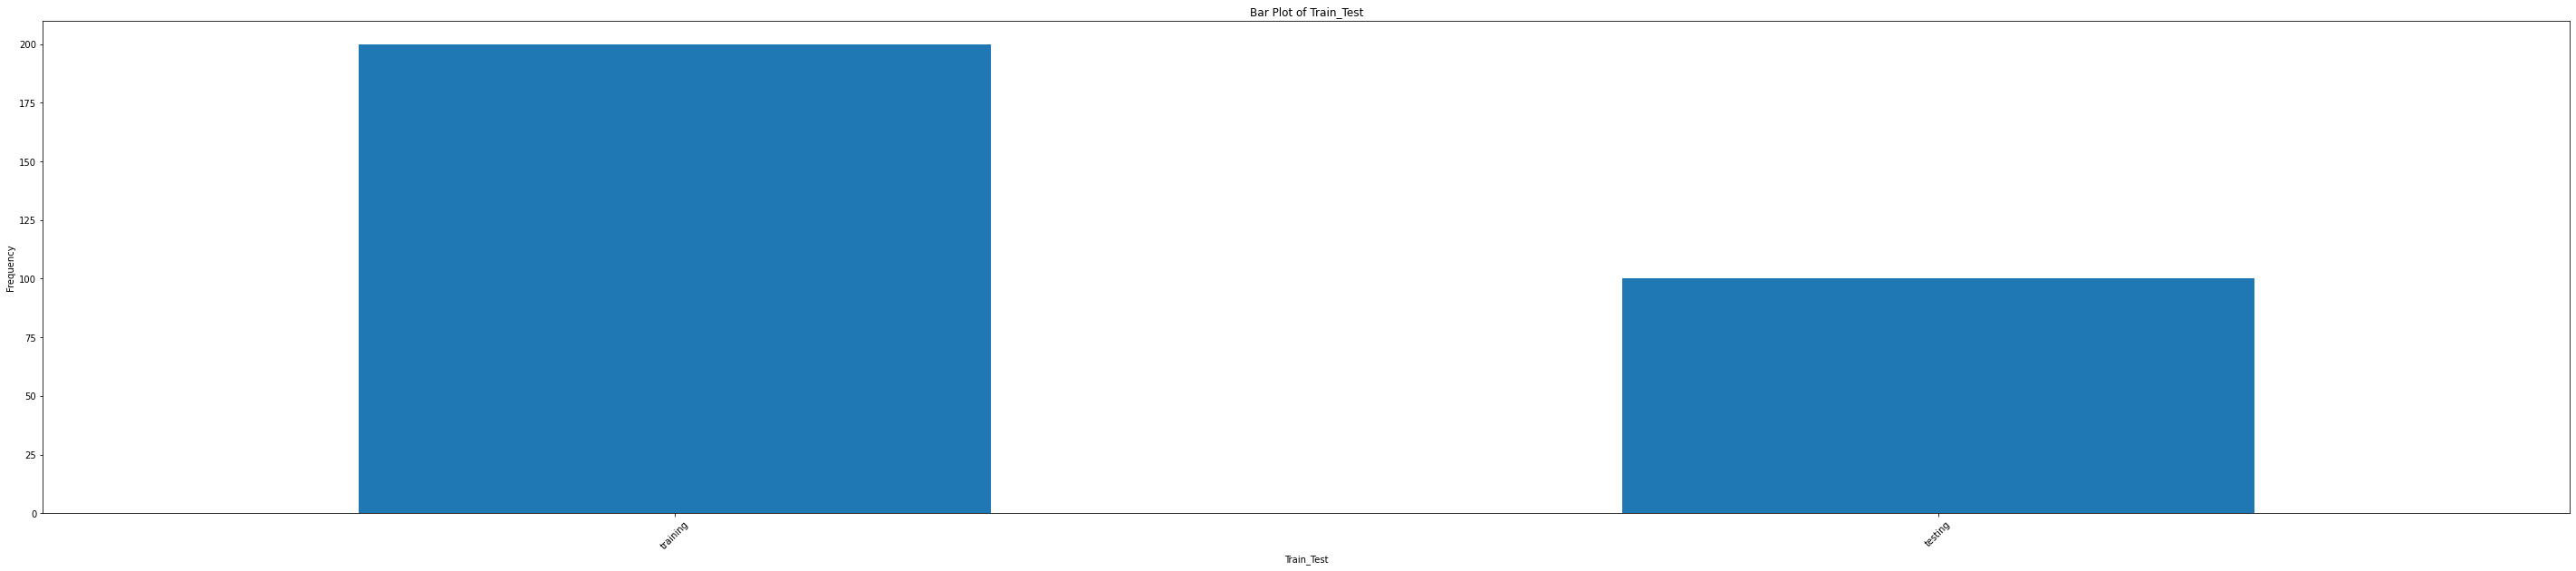

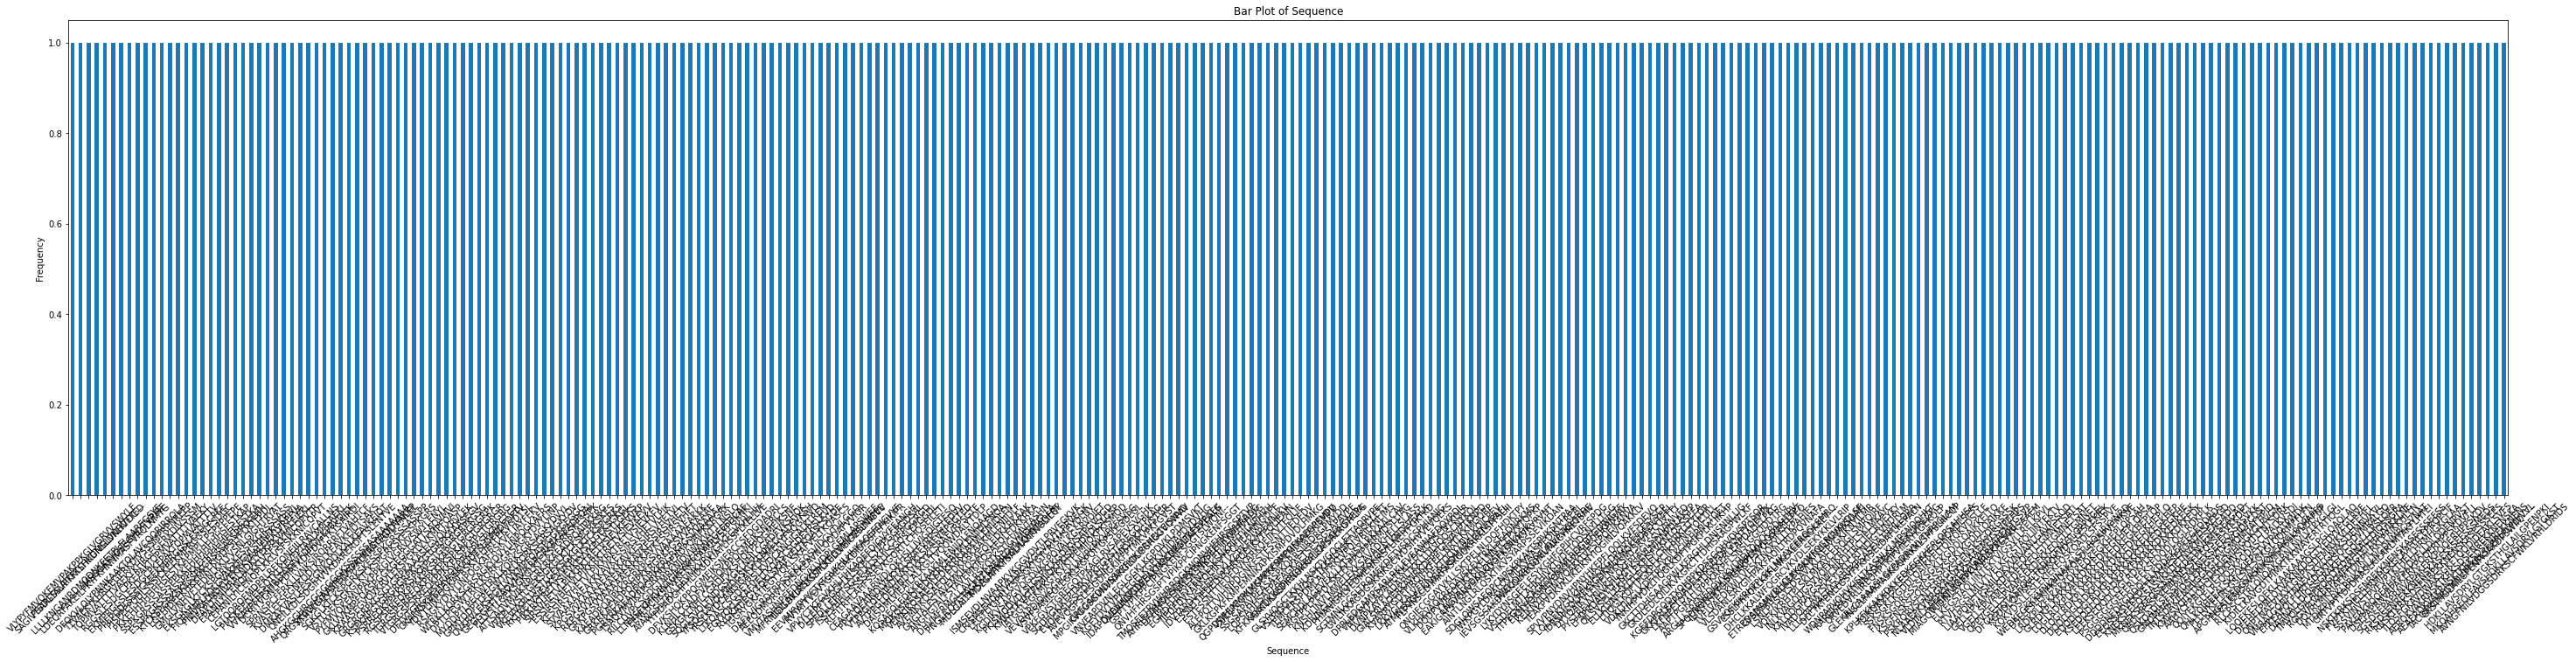

In [21]:
# bar plots
# Plotting bar plots for all categorical variables
import matplotlib.pyplot as plt
for col in categorical_columns:
    plt.figure(figsize=(50, 10))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

# One Hot Encoding

In [22]:
import numpy as np
X_dna = np.array(df['Sequence'])

np.save("/Users/Pragya Dhupia/Downloads/Machine Learning Project/New folder/peptide_sequences.npy",X_dna)

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Assuming df is your DataFrame with 'sequence' as feature column and 'label' as label column

# Separate features and labels
# X = df['sequence'].values.reshape(-1, 1)  # Reshape to 2D array for compatibility with OneHotEncoder
X = np.load("C:/Users/Pragya Dhupia/Downloads/Machine Learning Project/New folder/Peptide_OHE_Vectors_300_seq.npy")

y = np.array(df['Label'])

In [24]:
# # One-hot encode DNA sequences
# onehot_encoder = OneHotEncoder(sparse=False)
# X_onehot = onehot_encoder.fit_transform(X)


# Split dataset into train and test sets
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X_train.shape

(240, 775)

In [26]:
y_train = []
y_test = []

for i in range(len(y_train_1)):
    y_train.append(int(y_train_1[i]))
    
for i in range(len(y_test_1)):
    y_test.append(int(y_test_1[i]))

In [27]:
# y_test.shape

In [28]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),  # Set probability=True for SVC to enable predict_proba
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, y_pred, target_names=df['Label'].unique(), output_dict=True)
    weighted_f1 = report['weighted avg']['f1-score']
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Weighted F1 Score': weighted_f1, 'ROC AUC': roc_auc}


In [29]:
# Print results
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Weigh.F1', 'ROC AUC'))
for name, metrics in results.items():
    print("{:<20} {:.4f}     {:.4f}     {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(name, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score'], metrics['Weighted F1 Score'], metrics['ROC AUC']))


Classifier           Accuracy   Precision  Recall     F1 Score   Weigh.F1   ROC AUC   
KNN                  0.6333     0.6287     0.6333     0.6303     0.6303     0.6181
SVM                  0.5500     0.6012     0.5500     0.5484     0.5484     0.6406
Naive Bayes          0.5000     0.6025     0.5000     0.4686     0.4686     0.4797
Decision Tree        0.4000     0.4455     0.4000     0.3729     0.3729     0.4444
Random Forest        0.5500     0.6449     0.5500     0.5331     0.5331     0.5932
Gradient Boosting    0.5000     0.5502     0.5000     0.4961     0.4961     0.5370
Logistic Regression  0.5333     0.5778     0.5333     0.5333     0.5333     0.6088


In [30]:
# Example:
precision_score(y_test, y_pred, average='weighted')
# # Example:
# import warnings
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

0.5777777777777777

# NGRAM 

In [31]:
df

,Label,Train_Test,Sequence
0,1,training,VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE
1,1,training,PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL
2,1,training,SPQQVQRCVEILSRAKRPLMVLGSQALLTPT
3,1,training,ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV
4,1,training,AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG
...,...,...,...
295,0,testing,RLFITRHLAHFSSEVKGQRTLCHQSEILETI
296,0,testing,ISSEVHHLLSSSSAYKLLILSGQSLEPGGDL
297,0,testing,SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD
298,0,testing,DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL


In [32]:
import nltk
from nltk.util import ngrams

# Example DataFrame with DNA sequences
# df = ...

# Access the 'sequence' column from the DataFrame
dna_sequences = df['Sequence']

# Define the value of N for N-grams
N = 3  # Example: Using trigrams

# Function to generate N-grams for a single DNA sequence
def generate_ngrams(sequence):
    nucleotides = list(sequence)
    trigrams = list(ngrams(nucleotides, N))
    trigram_strings = [''.join(trigram) for trigram in trigrams]
    return trigram_strings

# Apply the function to each DNA sequence in the DataFrame
df_grams = df

df_grams['trigrams'] = dna_sequences.apply(generate_ngrams)
#print(df_grams)
df_grams.drop('Sequence', axis = 1)
# Print the DataFrame with added trigrams column
print(df_grams)


     Label Train_Test                         Sequence  \
0        1   training  VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE   
1        1   training  PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL   
2        1   training  SPQQVQRCVEILSRAKRPLMVLGSQALLTPT   
3        1   training  ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV   
4        1   training  AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG   
..     ...        ...                              ...   
295      0    testing  RLFITRHLAHFSSEVKGQRTLCHQSEILETI   
296      0    testing  ISSEVHHLLSSSSAYKLLILSGQSLEPGGDL   
297      0    testing  SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD   
298      0    testing  DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL   
299      0    testing  AVNGFNILVDGGSDRKSCFWKLVRHLDRIDS   

                                              trigrams  
0    [VLY, LYP, YPY, PYF, YFM, FMV, MVQ, VQK, QKE, ...  
1    [PYF, YFM, FMV, MVQ, VQK, QKE, KEM, EMV, MVP, ...  
2    [SPQ, PQQ, QQV, QVQ, VQR, QRC, RCV, CVE, VEI, ...  
3    [ARG, RGL, GLL, LLL, LLS, LSR, SRE, REN, ENE, ...  
4    [AAP, APT, PT

In [33]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# from sklearn.preprocessing import OneHotEncoder

# # Initialize the OneHotEncoder
# # If your scikit-learn version does not accept the `sparse` argument directly in the constructor, remove it.
# encoder = OneHotEncoder(sparse_output=False)  # This will work if sparse_output is a valid argument

# # If the above line fails, you can handle the sparse matrix like this:
# # encoder = OneHotEncoder()
# # and convert to dense matrix after transformation using .toarray()



# # Convert to dense array if you initialized without sparse_output=False
# # encoded_features = encoded_f


# sequences = df_grams['trigrams'].tolist()

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the sequences
# sequences_encoded = encoder.fit_transform(sequences)
# sequences_encoded = encoder.fit_transform(df_grams['Sequence'].values.reshape(-1, 1))

# # Get the feature names for the encoded columns
# feature_names = [f'base_{i}' for i in range(sequences_encoded.shape[1])]

# # Convert the encoded arrays back into a DataFrame
# encoded_df = pd.DataFrame(sequences_encoded, columns=feature_names)

# # Concatenate the encoded DataFrame with the original DataFrame
# encoded_data = pd.concat([df_grams, encoded_df], axis=1)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer for n-gram representation
vectorizer = CountVectorizer(analyzer='char', ngram_range=(0, 3))

# Fit and transform the data
X_ngram = vectorizer.fit_transform(df["Sequence"])

print("N-gram representation shape:", X_ngram.shape)
print("N-gram representation data:", X_ngram)


N-gram representation shape: (300, 3538)
N-gram representation data:   (0, 0)	32
  (0, 3161)	6
  (0, 1662)	3
  (0, 3430)	3
  (0, 2178)	4
  (0, 729)	1
  (0, 1919)	2
  (0, 2388)	1
  (0, 1394)	3
  (0, 514)	2
  (0, 9)	1
  (0, 863)	2
  (0, 2571)	1
  (0, 2756)	1
  (0, 3385)	1
  (0, 3258)	1
  (0, 1908)	1
  (0, 3501)	1
  (0, 2382)	1
  (0, 3449)	1
  (0, 801)	1
  (0, 2011)	2
  (0, 3310)	1
  (0, 2456)	1
  (0, 1431)	1
  :	:
  (299, 3411)	1
  (299, 2789)	1
  (299, 2661)	1
  (299, 1043)	1
  (299, 242)	1
  (299, 470)	1
  (299, 1235)	1
  (299, 921)	1
  (299, 2076)	1
  (299, 1891)	1
  (299, 202)	1
  (299, 469)	1
  (299, 858)	1
  (299, 2055)	1
  (299, 806)	1
  (299, 1320)	1
  (299, 3184)	1
  (299, 372)	1
  (299, 1599)	1
  (299, 2775)	1
  (299, 246)	1
  (299, 859)	1
  (299, 3414)	1
  (299, 3328)	1
  (299, 2641)	1


In [35]:
def generate_nGramFeatures(codes, n):
    nGramFeatures = []
    for codeSeq in codes:
        nGramSeq = nGrams(codeSeq, n)
        nGramCount = Counter(nGramSeq)
        nGramFeatures.append(nGramCount)
    return nGramFeatures


# Define a mapping for the codes to their corresponding tags
code_to_tag = {
    1: 'A',
    2: 'B',
    3: 'C',
    4: 'D',
    5: 'E',
    6: 'F',
    7: 'G',
    8: 'H',
    9: 'I',
    10: 'J',
    11: 'K',
    12: 'L',
    13: 'M',
    14: 'N',
    15: 'O',
    16: 'P',
    17: 'Q',
    18: 'R',
    19: 'S',
    20: 'T',
    21: 'U',
    22: 'V',
    23: 'W',
    24: 'X',
    25: 'Y',
    26: 'Z',

}

def nGrams(sequence, n):
    return zip(*[sequence[i:] for i in range(n)])

In [36]:
def transform_to_nGram_matrix(nGramFeatures, vocab):
    matrix = []
    for features in nGramFeatures:
        row = [features.get(nGram, 0) for nGram in vocab]
        matrix.append(row)
    return np.array(matrix)

In [37]:
from collections import Counter
from itertools import chain, combinations
# Transform the 'Code' column to their corresponding tags
df['Tag'] = df['Sequence'].map(code_to_tag)
Seq = df.groupby(df.index // 6)['Tag'].apply(list)
nGramFeatures = generate_nGramFeatures(Seq, n=2)

nGramAllPossibility = list(chain(*[combinations(code_to_tag.values(), 2)]))
vocab = sorted(set(nGramAllPossibility))

X_nGram = transform_to_nGram_matrix(nGramFeatures, vocab)

y = df['Label'][::6].to_numpy()  

In [38]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [39]:
y.shape 
X_nGram.shape

(50, 325)

In [40]:
X_nGram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
X_nGram.shape

(50, 325)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_nGram, y, test_size=0.2, random_state=42)

classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC(probability=True)),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression())
}

metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted F1': weighted_f1,
    }

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Weighted F1: {weighted_f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


K-Nearest Neighbors Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.6088

Support Vector Machine Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.6088

Naive Bayes Performance:
Accuracy: 0.8000, Precision: 0.4000, Recall: 0.5000, F1 Score: 0.4444, Weighted F1: 0.7111, ROC AUC: 0.6088



C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * n

Decision Tree Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.6088



C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.6088

Gradient Boosting Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.6088

Logistic Regression Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.6088



C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# HASHING

In [43]:
df

,Label,Train_Test,Sequence,trigrams,Tag
0,1,training,VLYPYFMVQKEMVPAKPPKGLVGRVVSWYLE,"[VLY, LYP, YPY, PYF, YFM, FMV, MVQ, VQK, QKE, ...",NaN
1,1,training,PYFMVQKEMVPAKPPKGLVGRVVSWYLENYL,"[PYF, YFM, FMV, MVQ, VQK, QKE, KEM, EMV, MVP, ...",NaN
2,1,training,SPQQVQRCVEILSRAKRPLMVLGSQALLTPT,"[SPQ, PQQ, QQV, QVQ, VQR, QRC, RCV, CVE, VEI, ...",NaN
3,1,training,ARGLLLSRENEDQVVKVLHDAQQQCRDGHPV,"[ARG, RGL, GLL, LLL, LLS, LSR, SRE, REN, ENE, ...",NaN
4,1,training,AAPTPGRALLVPPKAKPFLSNSLGGQDDTRG,"[AAP, APT, PTP, TPG, PGR, GRA, RAL, ALL, LLV, ...",NaN
...,...,...,...,...,...
295,0,testing,RLFITRHLAHFSSEVKGQRTLCHQSEILETI,"[RLF, LFI, FIT, ITR, TRH, RHL, HLA, LAH, AHF, ...",NaN
296,0,testing,ISSEVHHLLSSSSAYKLLILSGQSLEPGGDL,"[ISS, SSE, SEV, EVH, VHH, HHL, HLL, LLS, LSS, ...",NaN
297,0,testing,SPFDLLEPPTSGGFLKLSKPCCYIFPGGRGD,"[SPF, PFD, FDL, DLL, LLE, LEP, EPP, PPT, PTS, ...",NaN
298,0,testing,DLLEPPTSGGFLKLSKPCCYIFPGGRGDSAL,"[DLL, LLE, LEP, EPP, PPT, PTS, TSG, SGG, GGF, ...",NaN


In [44]:
from sklearn.feature_extraction.text import HashingVectorizer

# Initialize the HashingVectorizer
vectorizer = HashingVectorizer(n_features=100, norm=None, alternate_sign=False)

# Transform the data
X_hashing = vectorizer.fit_transform(df["Sequence"])

print("Hashing representation shape:", X_hashing.shape)
print("Hashing representation data:", X_hashing)


Hashing representation shape: (300, 100)
Hashing representation data:   (0, 58)	1.0
  (1, 68)	1.0
  (2, 98)	1.0
  (3, 86)	1.0
  (4, 39)	1.0
  (5, 33)	1.0
  (6, 90)	1.0
  (7, 70)	1.0
  (8, 29)	1.0
  (9, 35)	1.0
  (10, 90)	1.0
  (11, 37)	1.0
  (12, 19)	1.0
  (13, 57)	1.0
  (14, 48)	1.0
  (15, 2)	1.0
  (16, 60)	1.0
  (17, 89)	1.0
  (18, 74)	1.0
  (19, 30)	1.0
  (20, 56)	1.0
  (21, 15)	1.0
  (22, 53)	1.0
  (23, 99)	1.0
  (24, 13)	1.0
  :	:
  (275, 82)	1.0
  (276, 38)	1.0
  (277, 51)	1.0
  (278, 17)	1.0
  (279, 20)	1.0
  (280, 19)	1.0
  (281, 73)	1.0
  (282, 28)	1.0
  (283, 42)	1.0
  (284, 15)	1.0
  (285, 13)	1.0
  (286, 34)	1.0
  (287, 87)	1.0
  (288, 46)	1.0
  (289, 36)	1.0
  (290, 35)	1.0
  (291, 22)	1.0
  (292, 7)	1.0
  (293, 65)	1.0
  (294, 92)	1.0
  (295, 65)	1.0
  (296, 54)	1.0
  (297, 45)	1.0
  (298, 23)	1.0
  (299, 44)	1.0


In [45]:
hashed_df = pd.DataFrame.sparse.from_spmatrix(X_hashing)
df = df.drop("trigrams", axis =1)
df = df.drop("Sequence", axis =1)
# Concatenate original DataFrame and hashed DataFrame
concatenated_df = pd.concat([df, hashed_df], axis=1)

# Rename columns of hashed DataFrame
hashed_df.columns = ['Hashed_' + str(col) for col in hashed_df.columns]

# Concatenate original DataFrame and hashed DataFrame
hashed_df = pd.concat([df, hashed_df], axis=1)

# Display the new DataFrame
print("Original DataFrame:")
print(df)
print("\nHashed DataFrame:")
print(hashed_df)

Original DataFrame:
     Label Train_Test  Tag
0        1   training  NaN
1        1   training  NaN
2        1   training  NaN
3        1   training  NaN
4        1   training  NaN
..     ...        ...  ...
295      0    testing  NaN
296      0    testing  NaN
297      0    testing  NaN
298      0    testing  NaN
299      0    testing  NaN

[300 rows x 3 columns]

Hashed DataFrame:
     Label Train_Test  Tag  Hashed_0  Hashed_1  Hashed_2  Hashed_3  Hashed_4  \
0        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
1        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
2        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
3        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
4        1   training  NaN       0.0       0.0       0.0       0.0       0.0   
..     ...        ...  ...       ...       ...       ...       ...       ...   
295      0    testing  NaN       0.0       0.0       

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define the classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(with_mean=False), SVC(probability=True)),
    'Logistic Regression': make_pipeline(StandardScaler(with_mean=False), LogisticRegression()),
    'Gradient Boosting': make_pipeline(StandardScaler(with_mean=False), GradientBoostingClassifier())
    #'Naive Bayes': make_pipeline(StandardScaler(with_mean=False), GaussianNB()),
}

metrics = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else [0]*len(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if hasattr(clf, "predict_proba") else 0

    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted F1': weighted_f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Weighted F1: {weighted_f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.5000

Decision Tree Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.5000



C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya Dhupia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pragya 

Random Forest Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.5000

Support Vector Machine Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.5000

Logistic Regression Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.5000

Gradient Boosting Performance:
Accuracy: 0.2000, Precision: 0.1000, Recall: 0.5000, F1 Score: 0.1667, Weighted F1: 0.0667, ROC AUC: 0.5000

